### Data Dictionary

This data comes from the Chicago Police Department. 

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.5)


import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

### Data Exploration

In [2]:
df = pd.read_csv("mvt.csv",parse_dates=['Date'])

In [3]:
df

,Date,Latitude,Longitude
0,2012-12-31 23:15:00,41.756284,-87.621645
1,2012-12-31 22:00:00,41.898788,-87.661303
2,2012-12-31 22:00:00,41.969186,-87.767670
3,2012-12-31 22:00:00,41.769329,-87.657726
4,2012-12-31 21:30:00,41.837568,-87.621761
...,...,...,...
191636,2001-01-01 00:05:00,41.887566,-87.711323
191637,2001-01-01 00:01:00,41.981924,-87.658878
191638,2001-01-01 00:01:00,41.799024,-87.696538
191639,2001-01-01 00:01:00,41.971437,-87.727056


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       191641 non-null  datetime64[ns]
 1   Latitude   189365 non-null  float64       
 2   Longitude  189365 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.4 MB


In [5]:
df.describe(include='all')

,Date,Latitude,Longitude
count,191641,189365.000000,189365.000000
unique,131680,NaN,NaN
top,2008-05-16 00:00:00,NaN,NaN
freq,11,NaN,NaN
first,2001-01-01 00:01:00,NaN,NaN
last,2012-12-31 23:15:00,NaN,NaN
mean,NaN,41.844555,-87.677782
std,NaN,0.085583,0.057333
min,NaN,41.644710,-87.925510
25%,NaN,41.771618,-87.718474


In [6]:
df.shape

(191641, 3)

In [7]:
df.columns

Index(['Date', 'Latitude', 'Longitude'], dtype='object')

In [8]:
df['Year'] = df['Date'].dt.year

In [9]:
df['Month'] = df['Date'].dt.month

In [10]:
df['Day'] = df['Date'].dt.day

In [11]:
#df.to_csv("crime.csv",index=False)

In [12]:
yearcount = df.groupby(['Year']).count()

In [13]:
yearcount

,Date,Latitude,Longitude,Month,Day
Year,,,,,
2001,20669,20479,20479,20669,20669
2002,18753,17274,17274,18753,18753
2003,16657,16615,16615,16657,16657
2004,16862,16826,16826,16862,16862
2005,16484,16403,16403,16484,16484
2006,16098,16069,16069,16098,16098
2007,14280,14271,14271,14280,14280
2008,14445,14281,14281,14445,14445
2009,12167,12042,12042,12167,12167


In [14]:
yearcount.columns

Index(['Date', 'Latitude', 'Longitude', 'Month', 'Day'], dtype='object')

In [15]:
yearcount.drop(['Latitude', 'Longitude', 'Month', 'Day'],axis=1, inplace=True)

In [16]:
yearcount.rename(columns={'Date':'Yearcount'},inplace=True)

In [17]:
yearcount

,Yearcount
Year,
2001,20669
2002,18753
2003,16657
2004,16862
2005,16484
2006,16098
2007,14280
2008,14445
2009,12167


In [18]:
yearcount.reset_index(inplace=True)

In [19]:
yearcount

,Year,Yearcount
0,2001,20669
1,2002,18753
2,2003,16657
3,2004,16862
4,2005,16484
5,2006,16098
6,2007,14280
7,2008,14445
8,2009,12167
9,2010,15497


In [20]:
monthcount = df.groupby(['Month']).count()

In [21]:
monthcount

,Date,Latitude,Longitude,Year,Day
Month,,,,,
1,16047,15971,15971,16047,16047
2,13511,13403,13403,13511,13511
3,15758,15648,15648,15758,15758
4,15280,15157,15157,15280,15280
5,16035,15940,15940,16035,16035
6,16002,15911,15911,16002,16002
7,16801,16660,16660,16801,16801
8,16572,16425,16425,16572,16572
9,16060,15878,15878,16060,16060


In [22]:
monthcount.drop(['Latitude', 'Longitude', 'Year', 'Day'],axis=1, inplace=True)

In [23]:
monthcount.rename(columns={'Date':'Monthcount'},inplace=True)

In [24]:
monthcount

,Monthcount
Month,
1,16047
2,13511
3,15758
4,15280
5,16035
6,16002
7,16801
8,16572
9,16060


In [25]:
monthcount.reset_index(inplace=True)

In [26]:
monthcount

,Month,Monthcount
0,1,16047
1,2,13511
2,3,15758
3,4,15280
4,5,16035
5,6,16002
6,7,16801
7,8,16572
8,9,16060
9,10,17086


In [27]:
daycount = df.groupby(['Day']).count()

In [28]:
daycount

,Date,Latitude,Longitude,Year,Month
Day,,,,,
1,6446,6373,6373,6446,6446
2,6098,6034,6034,6098,6098
3,6096,6050,6050,6096,6096
4,5947,5892,5892,5947,5947
5,6339,6273,6273,6339,6339
6,6219,6156,6156,6219,6219
7,6329,6268,6268,6329,6329
8,6184,6115,6115,6184,6184
9,6180,6095,6095,6180,6180


In [29]:
daycount.drop(['Latitude', 'Longitude', 'Year', 'Month'],axis=1, inplace=True)

In [30]:
daycount.rename(columns={'Date':'Daycount'},inplace=True)

In [31]:
daycount.reset_index(inplace=True)

In [32]:
daycount

,Day,Daycount
0,1,6446
1,2,6098
2,3,6096
3,4,5947
4,5,6339
5,6,6219
6,7,6329
7,8,6184
8,9,6180
9,10,6404


### Data Visualization

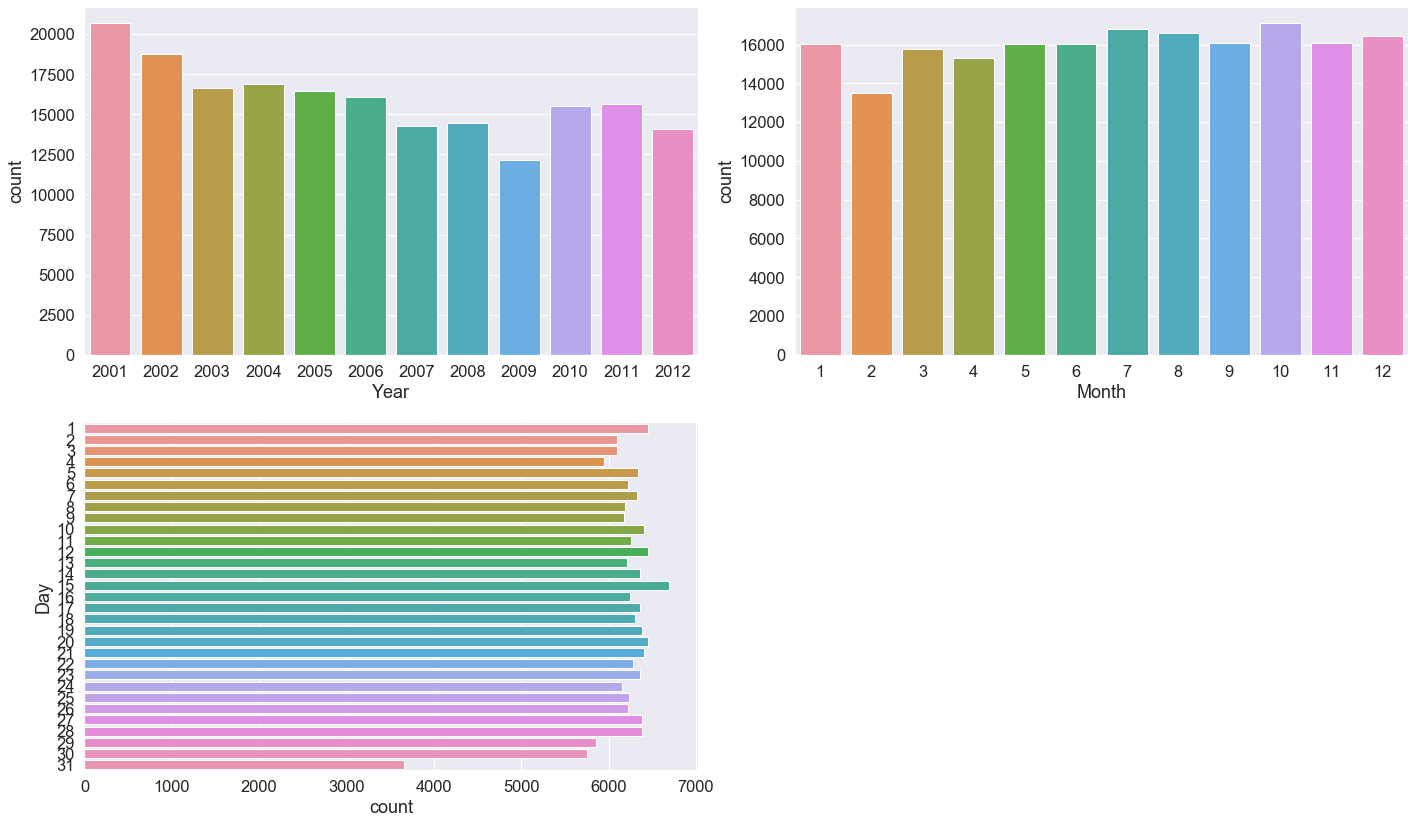

In [33]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
sns.countplot(df.Year)
plt.subplot(7,2,2)
sns.countplot(df.Month)
plt.subplot(7,2,3)
sns.countplot(y = df.Day)
# plt.subplot(7,2,4)
# sns.countplot()
# plt.subplot(7,2,5)
# sns.countplot()
# plt.subplot(7,2,6)
# sns.countplot()
# plt.subplot(7,2,7)
# sns.countplot()
# plt.subplot(7,2,8)
# sns.countplot()
# plt.subplot(7,2,9)
# sns.countplot()
# plt.subplot(7,2,10)
# sns.countplot()
# plt.subplot(7,2,11)
# sns.countplot()
# plt.subplot(7,2,12)
# sns.countplot()
# plt.subplot(7,2,13)
# sns.countplot()
# plt.subplot(7,2,14)
# sns.countplot()

plt.tight_layout()
plt.show()

### Bivariate Data Exploration

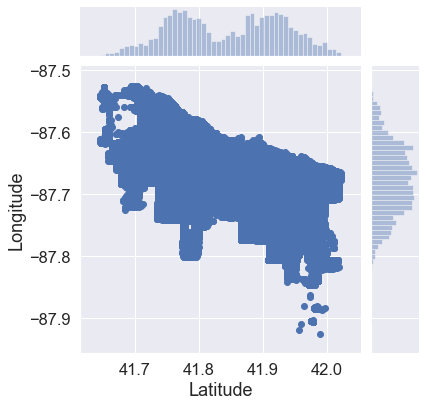

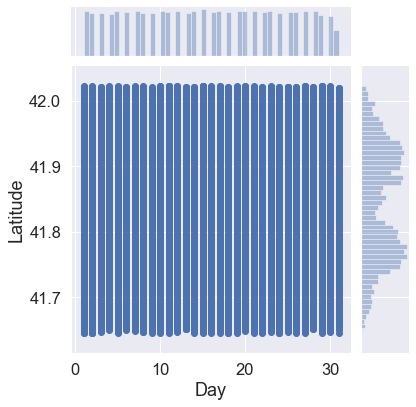

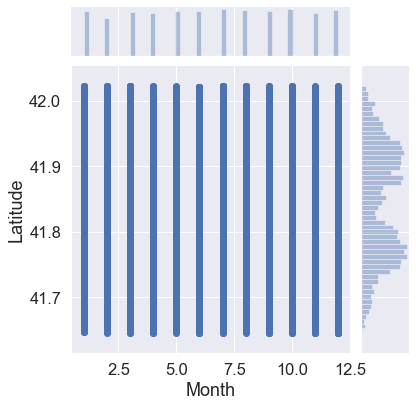

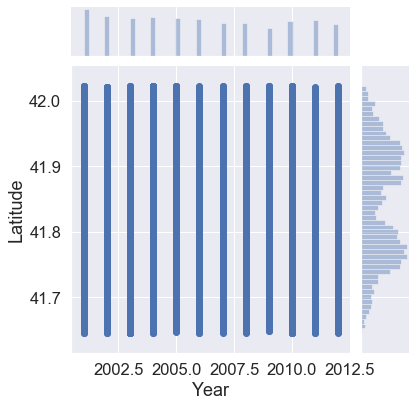

In [34]:
sns.jointplot(x='Latitude', y='Longitude',data=df, kind='scatter')

sns.jointplot(x='Day', y='Latitude',data=df, kind='scatter')

sns.jointplot(x='Month', y='Latitude',data=df, kind='scatter')

sns.jointplot(x='Year', y='Latitude',data=df, kind='scatter')


plt.show()

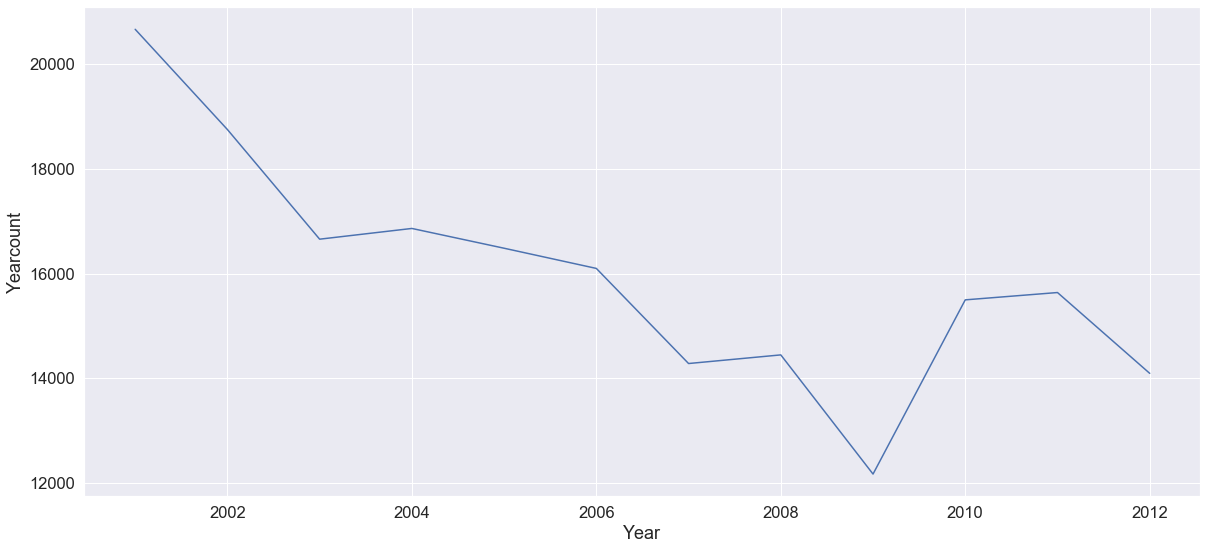

In [35]:
plt.figure(figsize=(20,9))
sns.lineplot(x=yearcount.Year, y=yearcount.Yearcount, data=yearcount, ci=None)
plt.show()

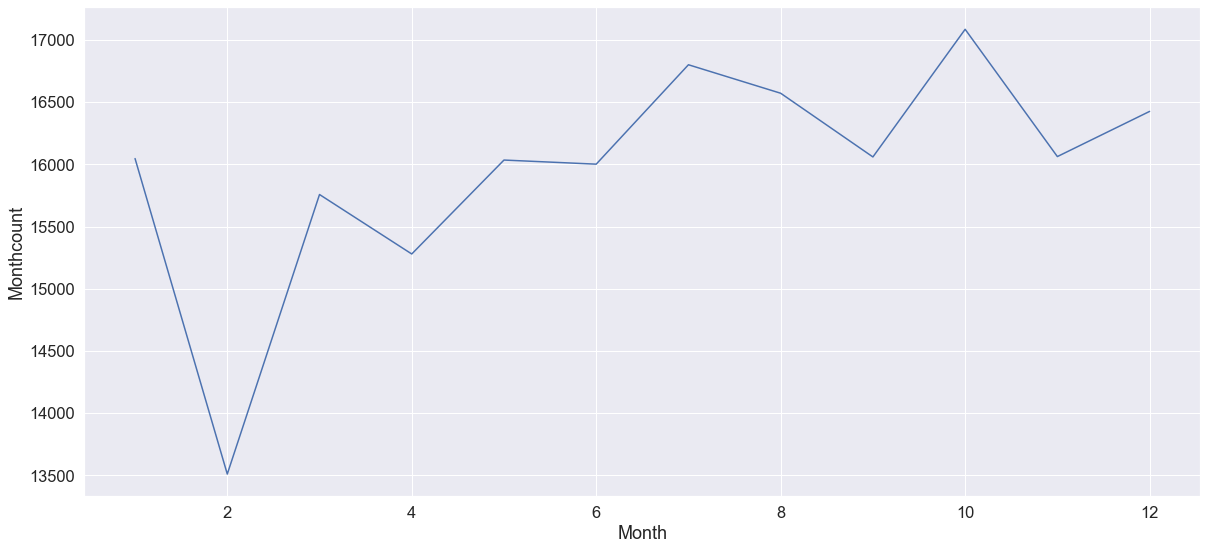

In [36]:
plt.figure(figsize=(20,9))
sns.lineplot(x=monthcount.Month, y=monthcount.Monthcount, data=monthcount, ci=None)
plt.show()

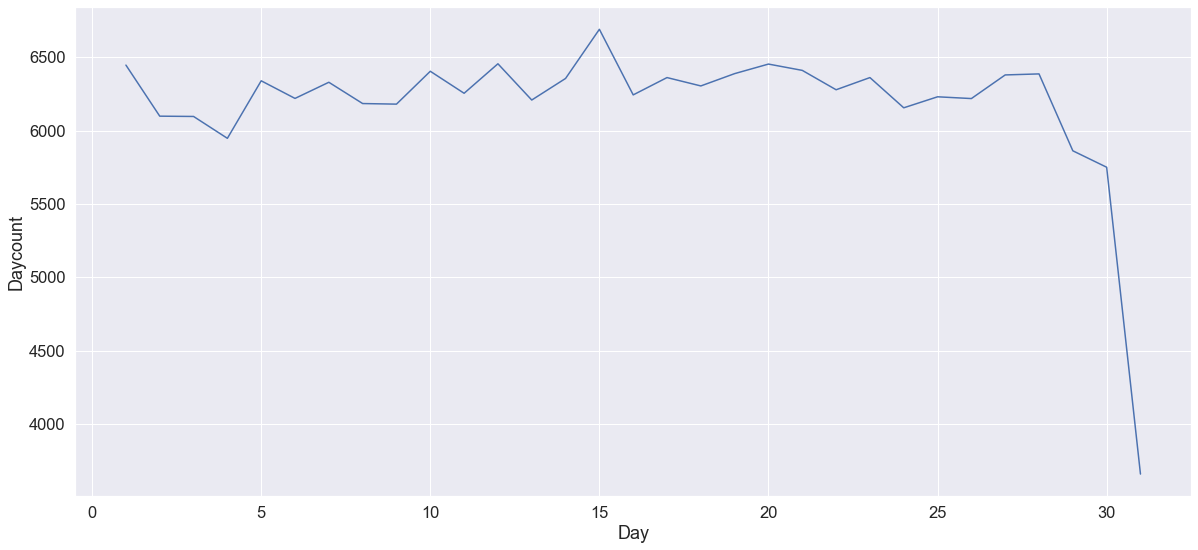

In [37]:
plt.figure(figsize=(20,9))
sns.lineplot(x=daycount.Day, y=daycount.Daycount, data=daycount, ci=None)
plt.show()